In [1]:
!pip install pandas
!pip install numpy
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

### Reading and dumping useless cols

[Dataset](https://datamarket.es/#productos-de-supermercados-dataset])

In [3]:
df = pd.read_csv("datamarket_productos_de_supermercados.csv")
df.drop(columns=["url", "description", "product_id"], inplace=True)
df.sort_values(by="insert_date", inplace=True)

### Getting desired products

First, we choose a product and search for the categories containing the word.

We then purge the categories by manually removing from the search words we know do not represent the product we are searching. 


We do this manually ;(

In [4]:
product = "leche"
word_black_list = "limpieza|perfumeria|embarazo|pan|bebe|condensa|arroz|polvo"
product_df = df[df.category.str.contains(product, na=False) & ~df.category.str.contains(word_black_list, na=False)]

In [5]:
product_df.category.unique()

array(['lacteos_y_huevos_leche_desnatada',
       'lacteos_y_huevos_leche_calcio',
       'lacteos_y_huevos_leche_sin_lactosa',
       'lacteos_y_huevos_leche_leches_especiales',
       'lacteos_y_huevos_leche_semidesnatada',
       'huevos_leche_y_mantequilla_huevos',
       'lacteos_y_huevos_leche_entera',
       'huevos_leche_y_mantequilla_leche_y_bebidas_vegetales',
       'huevos_leche_y_mantequilla_mantequilla_y_margarina',
       'la_despensa_lacteos_leche', 'despensa_lacteos_y_huevos_leche'],
      dtype=object)

### Get products that contain our word in the name

In [6]:
product_df = product_df[product_df.name.str.contains(product, case=False, na=False)]

### Mean price for a day

We use the reference_price, which is the price for unit (e.g. €/Kg, €/L, ...)

In [16]:
price_df = pd.DataFrame()
price_df["average_price_day"] = product_df.groupby("insert_date")['reference_price'].mean()

<AxesSubplot:xlabel='insert_date'>

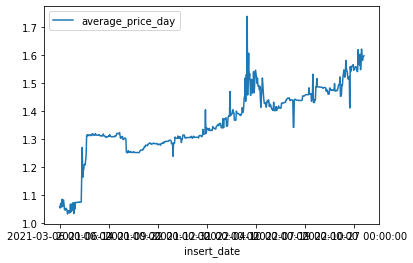

In [17]:
price_df.plot()

In [26]:
price_df.average_price_day

insert_date
2021-03-06 00:00:00    1.058571
2021-03-07 00:00:00    1.054000
2021-03-08 00:00:00    1.070687
2021-03-09 00:00:00    1.061395
2021-03-10 00:00:00    1.057287
                         ...   
2022-11-12 00:00:00    1.595791
2022-11-13 00:00:00    1.580642
2022-11-14 00:00:00    1.590948
2022-11-15 00:00:00    1.595654
2022-11-16 00:00:00    1.597119
Name: average_price_day, Length: 621, dtype: float64

In [36]:
base_price = price_df.iloc[0].average_price_day

### Normalizing

In [39]:
price_df["price_increase"] = (price_df.average_price_day - base_price) / base_price
price_df["price_increase"] = price_df["price_increase"]*100

<AxesSubplot:xlabel='insert_date'>

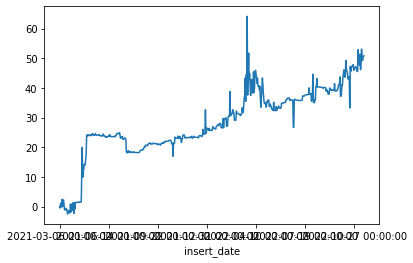

In [41]:
price_df["price_increase"].plot()